In [1]:
# from https://sisl.github.io/AutomotiveSimulator.jl/dev/tutorials/intersection/
using AutomotiveSimulator
using AutomotiveVisualization
using Random
using LinearAlgebra

roadway = Roadway()

Roadway

In [2]:
r = 5.0 # turn radius
w = DEFAULT_LANE_WIDTH
#=
A = VecSE2(0.0,w,-π)
B = VecSE2(0.0,0.0,0.0)
C = VecSE2(r,-r,-π/2)
D = VecSE2(r+w,-r,π/2)
E = VecSE2(2r+w,0,0)
F = VecSE2(2r+w,w,-π)
=#

3.0

In [3]:
function append_to_curve!(target::Curve, newstuff::Curve)
    s_end = target[end].s
    for c in newstuff
        push!(target, CurvePt(c.pos, c.s+s_end, c.k, c.kd))
    end
    return target
end

append_to_curve! (generic function with 1 method)

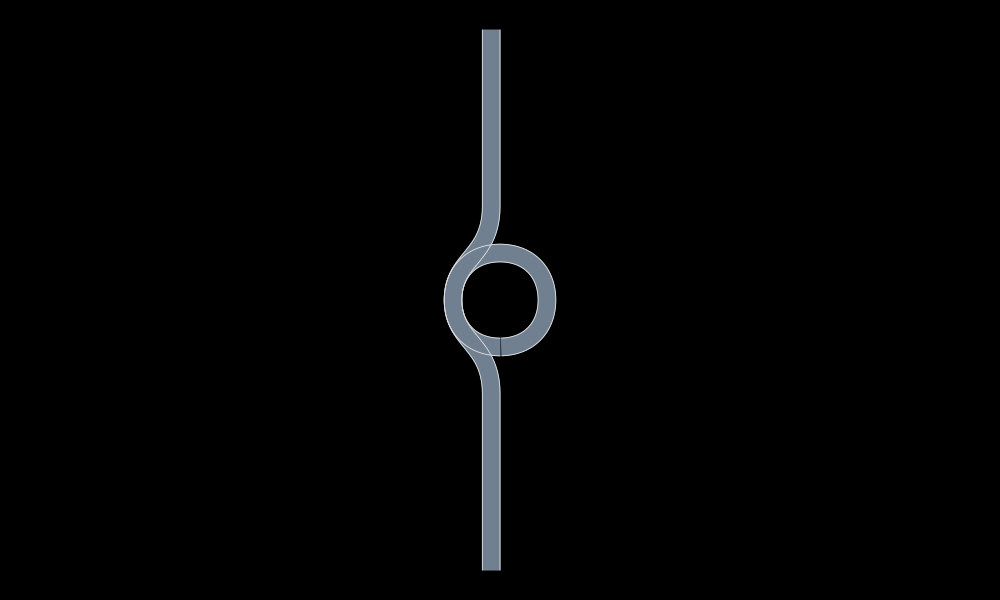

In [4]:
roadway = Roadway()
# make a loop
r=8.0
L = 30

curve = gen_bezier_curve(VecSE2(0,0.0),VecSE2(r,r,0.5*π), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_bezier_curve(VecSE2(r,r,0.5*π), VecSE2(0,2*r, π),  0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_bezier_curve(VecSE2(0,2*r,π), VecSE2(-r,r, 1.5*π),  0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_bezier_curve(VecSE2(-r,r, 1.5*π), VecSE2(0,0.0),  0.6r, 0.6r, 51)[2:end])

lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

#curve = gen_straight_curve(convert(VecE2, B), convert(VecE2, B+VecE2(50,0)), 2)
#lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
#push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Add one in-and-out to the roundabout
curve = gen_straight_curve(convert(VecE2, VecSE2(0-w/2,3r+L,0)), convert(VecE2, VecSE2(0-w/2,3r,π)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0-w/2,3r,-0.5*π), VecSE2(-r,r,-0.5π), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-r,r,-0.5π), VecSE2(0-w/2,-r,-0.5*π), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(0-w/2,-r,0)), convert(VecE2, VecSE2(0-w/2,-r-L,0)), 2))


lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

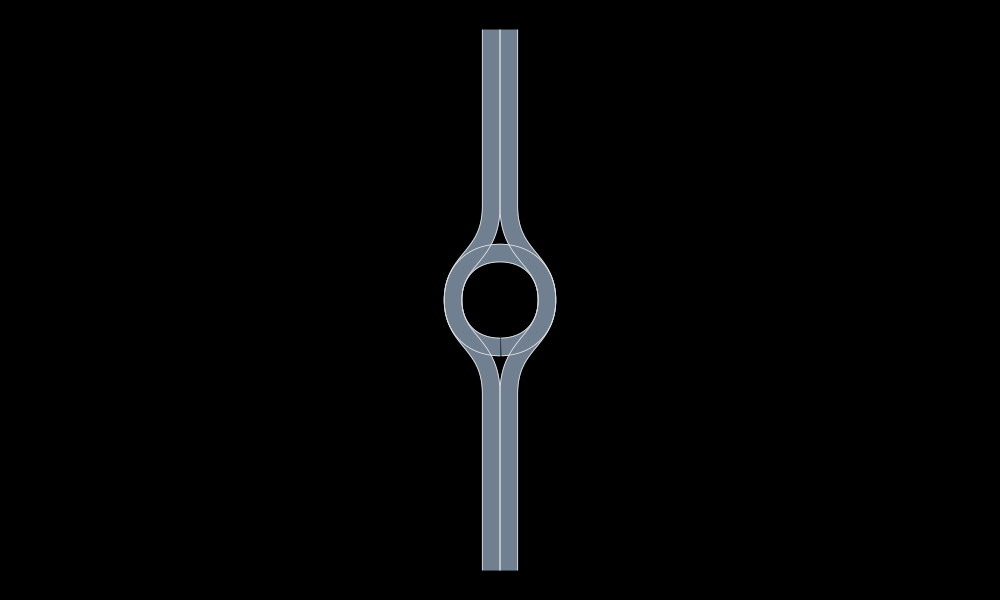

In [5]:
# Add second in-and-out to the roundabout
#=
curve = gen_bezier_curve(VecSE2(0.72r,0.27r,-0.75π),VecSE2(w/2,-r,-0.5*π), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,-r,-0.5*π)), convert(VecE2, VecSE2(w/2,-r-L,-0.5*π)), 2)[2:end])

append_to_curve!(gen_bezier_curve(VecSE2(0.72r,2r-0.27r,0.75π),VecSE2(w/2,3r,0.5*π), 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,3r,0.5*π)), convert(VecE2, VecSE2(w/2,3r+L,0.5*π)), 2)[2:end])
=#
curve = gen_straight_curve(convert(VecE2, VecSE2(w/2,3r+L,0)), convert(VecE2, VecSE2(w/2,3r,π)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(w/2,3r,-0.5*π), VecSE2(r,r,-0.5π), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(r,r,-0.5π), VecSE2(w/2,-r,-0.5*π), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,-r,0)), convert(VecE2, VecSE2(w/2,-r-L,0)), 2))


lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

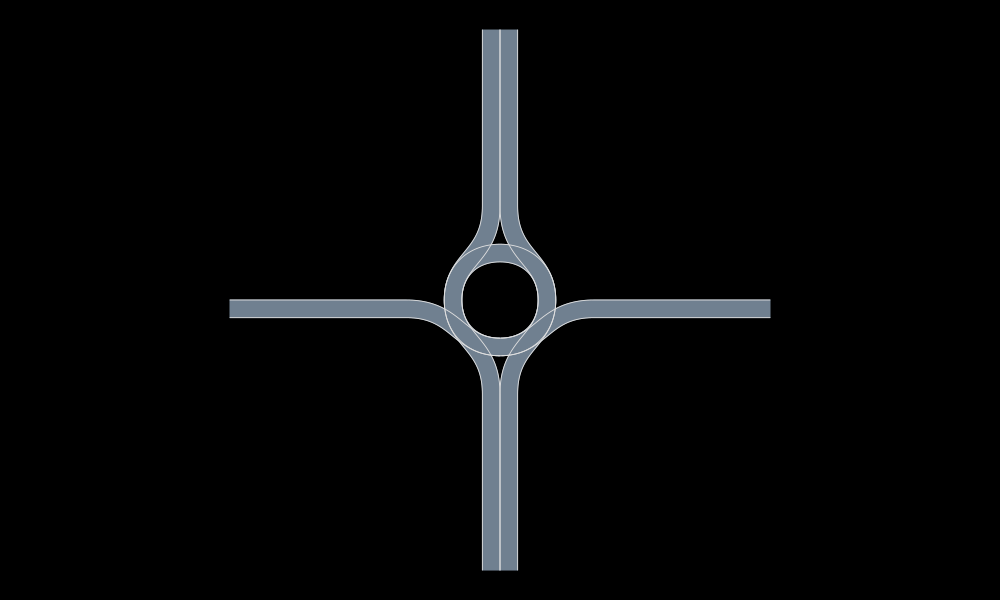

In [6]:
# Add third (horizontal) in-and-out to the roundabout
#=
curve = gen_bezier_curve(VecSE2(r-0.27r,r-0.72r,0.25π),VecSE2(2r,r-w/2,0), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r-w/2,0)), convert(VecE2, VecSE2(2r+L,r-w/2,0)), 2)[2:end])

append_to_curve!(gen_bezier_curve(VecSE2(-r+0.27r,r-0.72r,0.75π),VecSE2(-2r,r-w/2,π), 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(-2r,r-w/2,π)), convert(VecE2, VecSE2(-2r-L,r-w/2,π)), 2)[2:end])
=#
curve = gen_straight_curve(convert(VecE2, VecSE2(-2r-L,r-w/2,0)), convert(VecE2, VecSE2(-2r,r-w/2, 0)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-2r,r-w/2,0), VecSE2(0,0.,0), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0,0.,0), VecSE2(2r,r-w/2,0), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r-w/2,0)), convert(VecE2, VecSE2(2r+L,r-w/2,0)), 2))

lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

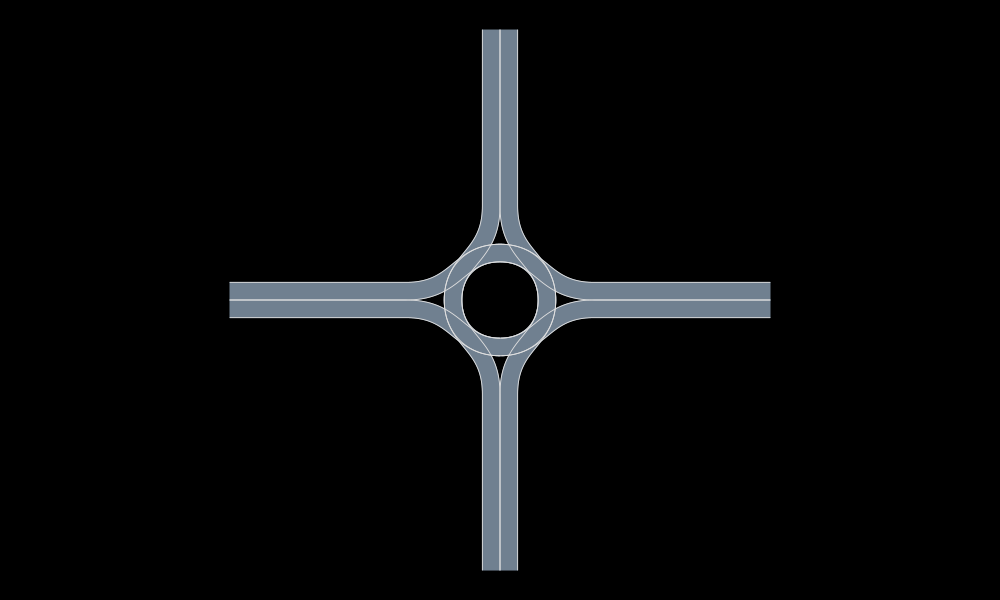

In [7]:
# Add fourth (horizontal) in-and-out to the roundabout
#=
curve = gen_bezier_curve(VecSE2(r-0.27r,r+0.72r,-0.25π),VecSE2(2r,r+w/2,0), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r+w/2,0)), convert(VecE2, VecSE2(2r+L,r+w/2,0)), 2)[2:end])


append_to_curve!(gen_bezier_curve(VecSE2(-r+0.27r,r+0.72r,-0.75π),VecSE2(-2r,r+w/2,π), 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(-2r,r+w/2,π)), convert(VecE2, VecSE2(-2r-L,r+w/2,π)), 2)[2:end])
=#
curve = gen_straight_curve(convert(VecE2, VecSE2(-2r-L,r+w/2,0)), convert(VecE2, VecSE2(-2r,r+w/2, 0)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-2r,r+w/2,0), VecSE2(0,2r,0), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0,2r,0), VecSE2(2r,r+w/2,0), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r+w/2,0)), convert(VecE2, VecSE2(2r+L,r+w/2,0)), 2))

lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

In [8]:
# from https://sisl.github.io/AutomotiveSimulator.jl/dev/tutorials/intersection/
# We will use lateral and longitudinal acceleration to control a car in the intersection. The first step is to define a corresponding action type that will contain the acceleration inputs.
#=
struct LaneSpecificAccelLatLon
    a_lat::Float64
    a_lon::Float64
end

# Next, add a method to the propagate function to update the state using our new action type.

function AutomotiveSimulator.propagate(veh::Entity, action::LaneSpecificAccelLatLon, roadway::Roadway, Δt::Float64)
    lane_tag_orig = veh.state.posF.roadind.tag
    state = propagate(veh, LatLonAccel(action.a_lat, action.a_lon), roadway, Δt)
    roadproj = proj(state.posG, roadway[lane_tag_orig], roadway, move_along_curves=false)
    retval = VehicleState(Frenet(roadproj, roadway), roadway, state.v)
    return retval
end

=#
include("lane_specific_driver.jl")

In [9]:
# We define a driver model, which can be seen as a distribution over actions. # TODO Here we will define the simplest model, which is to repeat the same action.
mutable struct InterDriver <: DriverModel{LaneSpecificAccelLatLon}
    a::LaneSpecificAccelLatLon
    s1::Int # state 1 (distance traveled (in buckets))
    s2::Int # state 2 (distance to other vehicle (in buckets))
    s3::Int # velocity (in buckets)
    action::Symbol # :DECEL, :ZERO or :ACCEL
    model_type::Symbol # :RL, :SAFE = fixed safe policy, :UNSAFE = unsafe policy
    p::Float64 # Threshold used for unsafe policy to decide whether to be dangerous. Setting this high produces safer behavior
end

# This is a roundabout driver model that behaves correctly.
function get_safe_action(model)
    # If distance to another car is less than 2 and we are NOT in the roundabout
    if model.s2 < 2 && (model.s1 < L || model.s1 > 2*L)
        return :DECEL
    # if we are going too fast, don't accelerate
    elseif model.s3 >= 10
        return :ZERO
    # speed up to desired speed
    else
        return :ACCEL
    end
end

# This is a dangerous roundabout driver who sometimes does not yield and sometimes stops in the intersection!
# I see a lot of these drivers at Stanford which is why I decided to model them
function get_unsafe_action(model)
    # rand() returns a number between 0 and 1
    # Should we yield when outside the roundabout??
    if rand() < model.p && model.s2 < 2 && (model.s1 == 1 || model.s1 == 3)
        return :DECEL
    # Should we stop inside the roundabout??
    elseif rand() < model.p && model.s2 < 2
        return :DECEL
    # stay at desired speed
    elseif model.s3 >= 10
        return :ZERO
    # speed up if too slow
    else
        return :ACCEL
    end
end

LoadError: UndefVarError: LaneSpecificAccelLatLon not defined

In [10]:
function get_action(model::InterDriver)
    if model.model_type == :RL
        return get_rl_action(model)
    elseif model.model_type == :SAFE
        return get_safe_action(model)
    elseif model.model_type == :UNSAFE
        return get_unsafe_action(model)
    end
end

LoadError: UndefVarError: InterDriver not defined

In [11]:
# update the state with observations here
function AutomotiveSimulator.observe!(model::InterDriver, scene::Scene, roadway::Roadway, egoid::Int64)
    
    # update state
    x = posg(scene[egoid].state)[1:2]
    v = velg(scene[egoid].state)
    s = posf(scene[egoid]).s
    model.s1 = div(s, L) # each lane is approximately 3L long so this divides into 1, 2, 3
    states = map( i -> posg(scene[i].state)[1:2] , filter( (i) -> i != egoid && (posg(scene[i].state)[1:2]-x)⋅v > 0.0, 1:length(scene)) )
    if length(states) == 0
        model.s2 = 10
    else
        model.s2 = Integer(trunc(0.2*minimum(map( (s) -> norm(x .- s, 2), states) )))
    end
    v = velf(scene[egoid].state)
    model.s3 = Integer(trunc(norm([v.t; v.s], 2)))
    
    # get action
    model.action = get_action(model)
    # update based on action
    th = posg(scene[egoid].state)[3]
    # translate high level MDP action to accel signal
    if model.action == :DECEL
        model.a = LaneSpecificAccelLatLon(-v.t, -v.s)
    elseif model.action == :ZERO
        model.a = LaneSpecificAccelLatLon(0.0, 0.0)
    elseif model.action == :ACCEL
        model.a = model.a = LaneSpecificAccelLatLon(0.1*v.t, 0.5*v.s)
    end
    return model
end

# Samples an action from the model
function Base.rand(::AbstractRNG, model::InterDriver)
    return model.a
end

LoadError: UndefVarError: InterDriver not defined

In [12]:
#using Reel

timestep = 0.1
nticks = 300

vs0 = VehicleState(VecSE2(-L, r-DEFAULT_LANE_WIDTH/2, 0.0), roadway, 8.0)
vs1 = VehicleState(VecSE2(L, r+DEFAULT_LANE_WIDTH/2, π), roadway, 9.0) # desired speed 9.0
snail = VehicleState(VecSE2(DEFAULT_LANE_WIDTH/2, -L, 0.5π), roadway, 5.0)


scene = Scene([Entity(vs0, VehicleDef(), 1),
               Entity(vs1, VehicleDef(), 2),
               Entity(snail, VehicleDef(), 3)
            ])

car_colors = Dict(:UNSAFE => RGB(0.95, 0.1, 0.1),
              :SAFE   => RGB(0.1, 0.95, 0.1),
              :RL     => RGB(0.6, 0.1, 0.6),)

colors = Dict( 1 => car_colors[:UNSAFE],
2 => car_colors[:UNSAFE],
3 => car_colors[:UNSAFE])

models = Dict(1 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 1.0),
              2 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :UNSAFE, 0.5),
              3 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 0.5),
             )


scenes = simulate(scene, roadway, models, nticks, timestep)
#snapshot = render(renderables)

LoadError: UndefVarError: LaneSpecificAccelLatLon not defined

In [13]:
using Interact
using Reel
using Blink
#md
w = Window()
viz = @manipulate for step in 1 : length(scenes)
    render([roadway, scenes[step]])
end
body!(w, viz)

WebIO._IJuliaInit()

LoadError: UndefVarError: scenes not defined

In [14]:

#md
w = Window()
viz = @manipulate for i = 1 : length(scenes)
    renderables = [
    roadway,
    (FancyCar(car=veh, color=colors[veh.id]) for veh in scenes[i])...
    ]
    render(renderables)
end
body!(w, viz)

LoadError: UndefVarError: scenes not defined